### Read in Libraries

In [124]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.api import VAR



### Read in the data

In [7]:
df = pd.read_csv('../data/final_dfs/combined_final.csv', index_col='date')

In [8]:
df.head()

,Biomass,Coal,Hydro,Nuclear,Other,Solar,Wind,NGas
date,,,,,,,,
2011-01-01,1240.848016,304483.8981,670.712237,90516.91023,357.449324,70.651290,123213.38820,248086.36399
2011-01-02,1478.590690,320703.6726,667.009668,90462.21494,372.626928,10.255158,62531.39844,268971.64998
2011-01-03,1483.246127,296436.2237,741.426017,90472.37075,401.536782,15.155827,89515.57352,222285.00985
2011-01-04,1411.010006,322214.6377,683.281626,90312.68708,478.415477,5.278214,59542.48570,271747.93685
2011-01-05,1348.331266,308136.0801,623.145421,90280.19160,440.383112,22.997359,128920.84250,358001.80005


In [9]:
df['total'] = df.sum(axis=1)

In [10]:
df

,Biomass,Coal,Hydro,Nuclear,Other,Solar,Wind,NGas,total
date,,,,,,,,,
2011-01-01,1240.848016,304483.898100,670.712237,90516.910230,357.449324,70.651290,123213.388200,248086.363990,7.686402e+05
2011-01-02,1478.590690,320703.672600,667.009668,90462.214940,372.626928,10.255158,62531.398440,268971.649980,7.451974e+05
2011-01-03,1483.246127,296436.223700,741.426017,90472.370750,401.536782,15.155827,89515.573520,222285.009850,7.013505e+05
2011-01-04,1411.010006,322214.637700,683.281626,90312.687080,478.415477,5.278214,59542.485700,271747.936850,7.463957e+05
2011-01-05,1348.331266,308136.080100,623.145421,90280.191600,440.383112,22.997359,128920.842500,358001.800050,8.877738e+05
...,...,...,...,...,...,...,...,...,...
2020-12-27,635.255371,184407.678785,500.494667,122762.954790,13.731479,29820.239198,321323.147861,194637.587100,8.541011e+05
2020-12-28,591.302614,193621.421107,636.269588,122720.408975,-13.652177,19924.960198,350947.810220,216475.798107,9.049043e+05
2020-12-29,667.202987,144900.104532,643.995831,122664.769337,-26.962775,11594.382815,443182.060206,167954.504264,8.915801e+05


In [11]:
df.isnull().sum()

Biomass    181
Coal         0
Hydro        0
Nuclear      0
Other        0
Solar      173
Wind         0
NGas         0
total        0
dtype: int64

<AxesSubplot:>

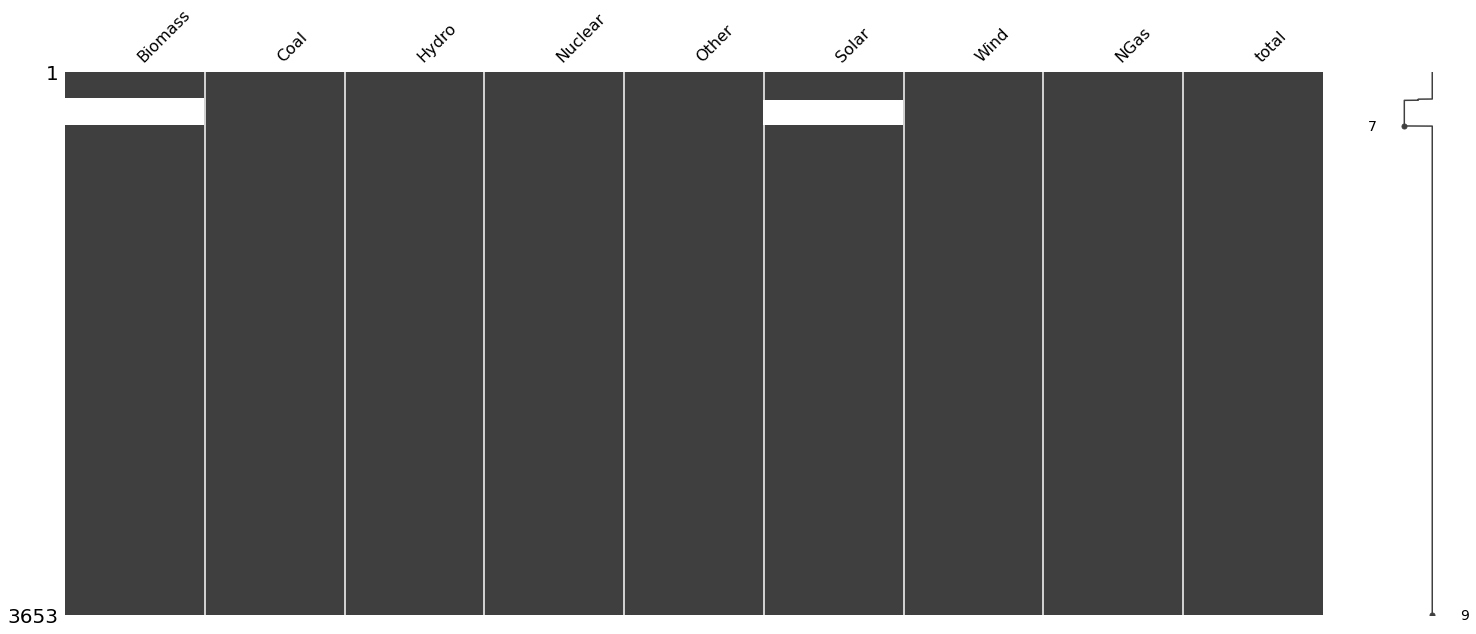

In [12]:
msno.matrix(df)

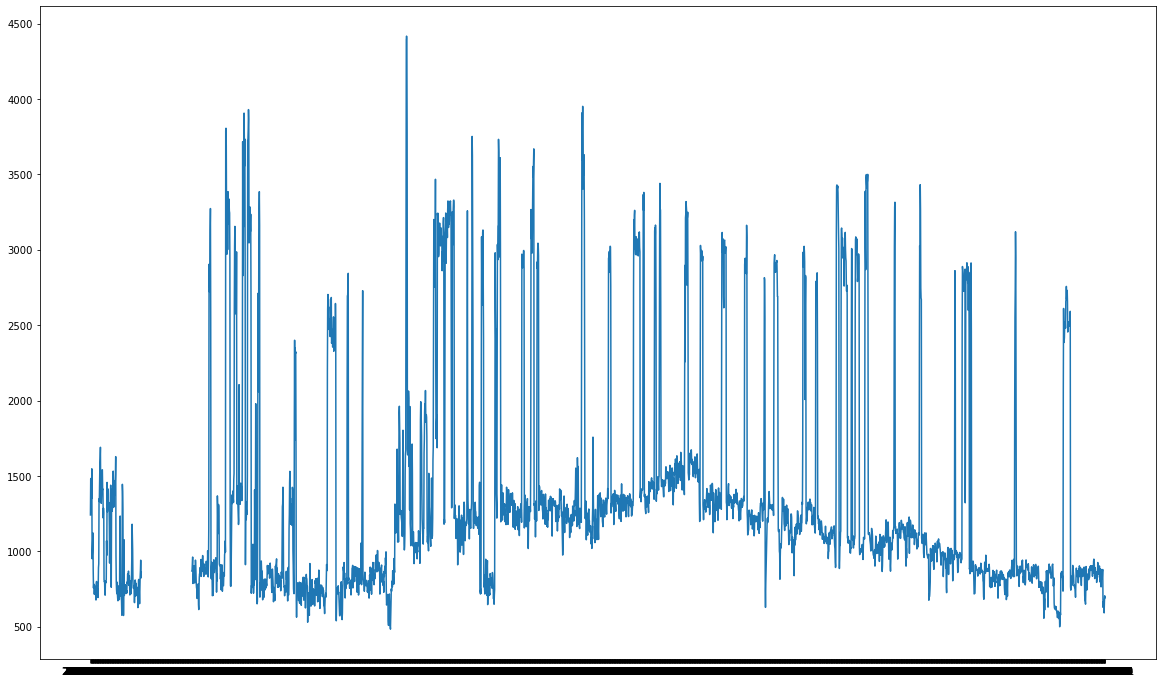

In [16]:
plt.figure(figsize=(20,12))
plt.plot(df['Biomass']);

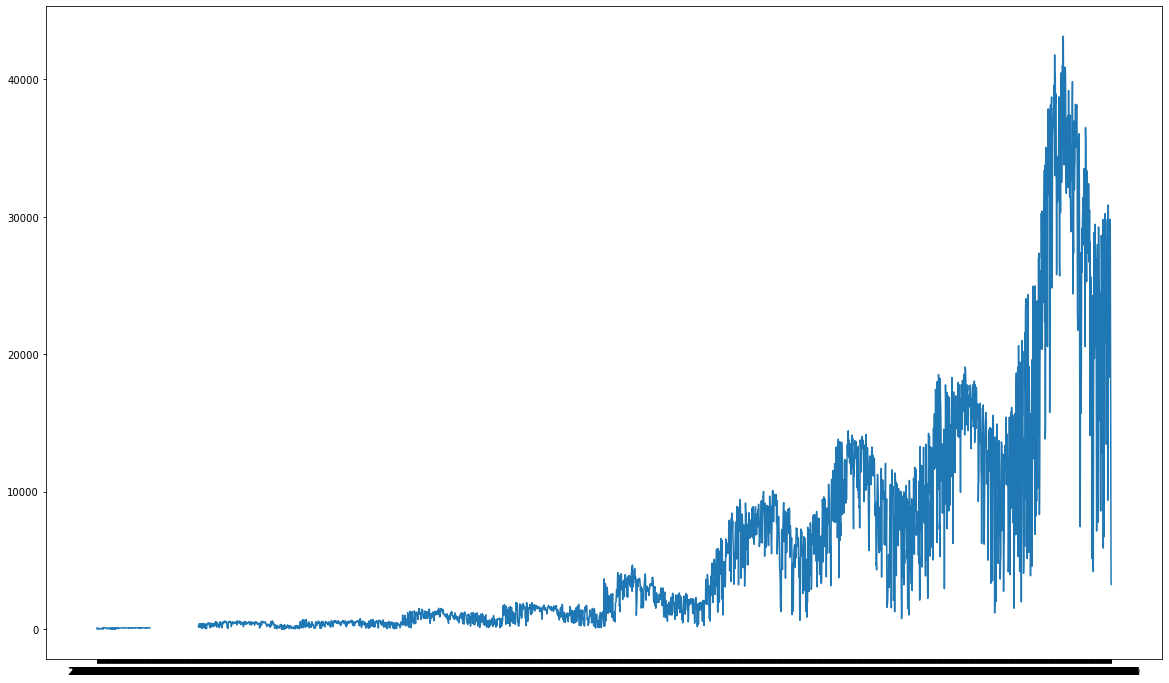

In [17]:
plt.figure(figsize=(20,12))
plt.plot(df['Solar']);

In [19]:
df.fillna(method='ffill', inplace = True)

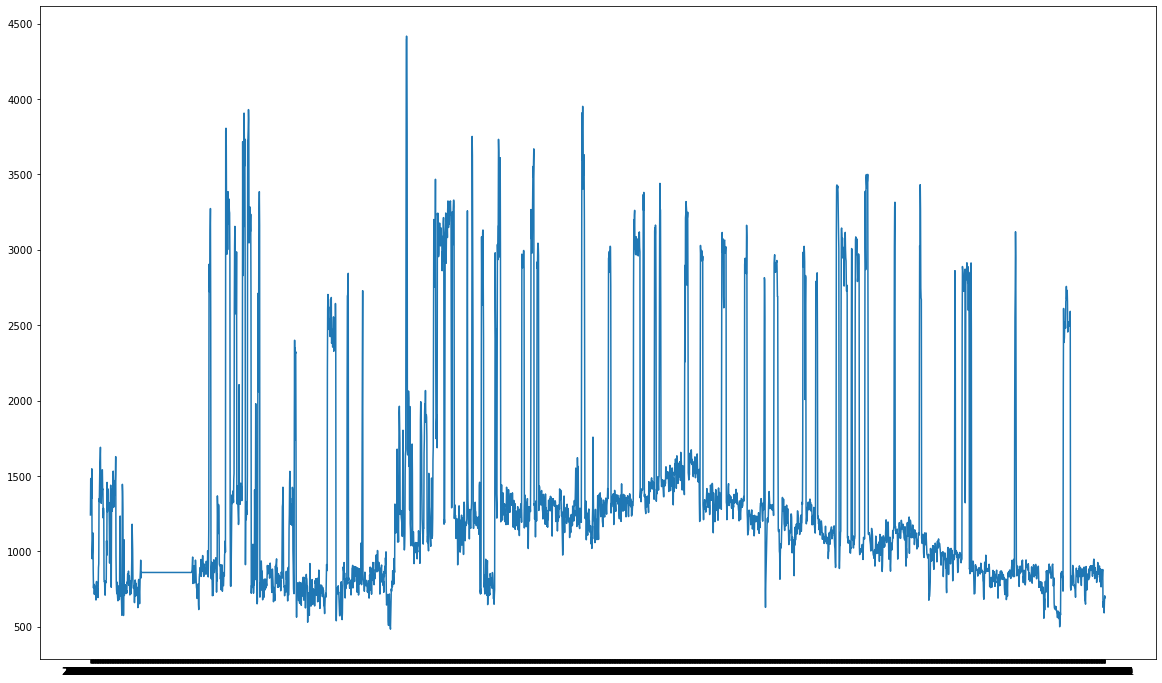

In [20]:
plt.figure(figsize=(20,12))
plt.plot(df['Biomass']);

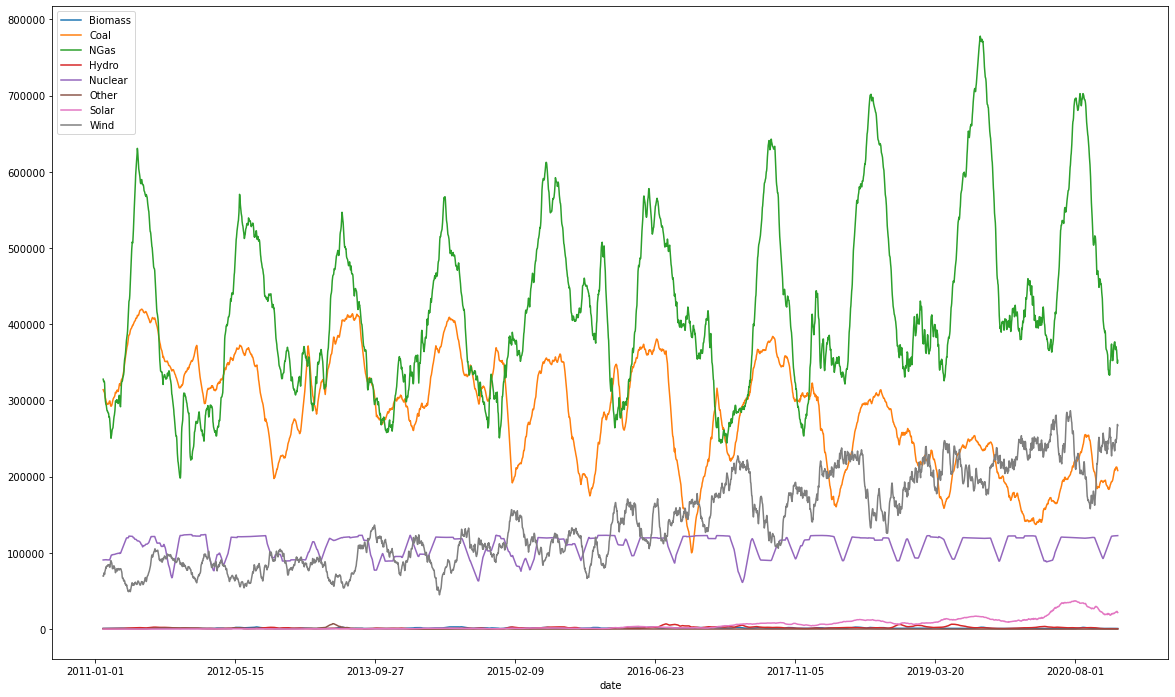

In [22]:
plt.figure(figsize=(20,12))

df.rolling(30)['Biomass'].mean().plot(kind='line')
df.rolling(30)['Coal'].mean().plot(kind='line')
df.rolling(30)['NGas'].mean().plot(kind='line')
df.rolling(30)['Hydro'].mean().plot(kind='line')
df.rolling(30)['Nuclear'].mean().plot(kind='line')
df.rolling(30)['Other'].mean().plot(kind='line')
df.rolling(30)['Solar'].mean().plot(kind='line')
df.rolling(30)['Wind'].mean().plot(kind='line')

plt.legend(['Biomass', 'Coal', 'NGas', 'Hydro', 'Nuclear', 'Other', 'Solar', 'Wind'])


## VAR Time Series Models

In [23]:
# Code written by Joseph Nelson.
# Improved by Hovanes Gasparian

def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:3], index=['Test Statistic','p-value', 'Lag Used'])
    return dfoutput

## Dickey-Fuller Tests on each Source

### Total

In [35]:
interpret_dftest(adfuller(df['total']))

Test Statistic    -3.656148
p-value            0.004774
Lag Used          29.000000
dtype: float64

In [110]:
interpret_dftest(adfuller(df['total'].diff(12).dropna()))

Test Statistic   -9.087056e+00
p-value           3.914465e-15
Lag Used          2.900000e+01
dtype: float64

In [111]:
df['first_diff_total'] = df['total'].diff(12)

### Biomass

In [24]:
interpret_dftest(adfuller(df['Biomass']))

Test Statistic   -7.435146e+00
p-value           6.211646e-11
Lag Used          2.400000e+01
dtype: float64

### Coal

In [25]:
interpret_dftest(adfuller(df['Coal']))

Test Statistic    -2.877402
p-value            0.048040
Lag Used          29.000000
dtype: float64

In [83]:
interpret_dftest(adfuller(df['Coal'].diff(1).dropna()))

Test Statistic   -1.802050e+01
p-value           2.696237e-30
Lag Used          2.400000e+01
dtype: float64

In [85]:
df['first_diff_coal'] = df['Coal'].diff(1)

### Gas

In [26]:
interpret_dftest(adfuller(df['NGas']))

Test Statistic    -4.165856
p-value            0.000752
Lag Used          24.000000
dtype: float64

In [102]:
interpret_dftest(adfuller(df['NGas'].diff(12).dropna()))

Test Statistic   -9.899174e+00
p-value           3.393818e-17
Lag Used          2.900000e+01
dtype: float64

In [103]:
df['first_diff_ngas'] = df['NGas'].diff(12)

### Hydro

In [28]:
interpret_dftest(adfuller(df['Hydro']))

Test Statistic    -4.377611
p-value            0.000325
Lag Used          30.000000
dtype: float64

### Nuclear

In [14]:
interpret_dftest(adfuller(df['Nuclear']))

Test Statistic   -2.949252
p-value           0.039913
Lag Used          3.000000
dtype: float64

In [104]:
interpret_dftest(adfuller(df['Nuclear'].diff(12).dropna()))

Test Statistic   -1.224149e+01
p-value           1.000205e-22
Lag Used          2.500000e+01
dtype: float64

In [105]:
df['first_diff_nuclear'] = df['Nuclear'].diff(12)

### Other

In [29]:
interpret_dftest(adfuller(df['Other']))

Test Statistic    -4.578738
p-value            0.000141
Lag Used          30.000000
dtype: float64

### Wind

In [30]:
interpret_dftest(adfuller(df['Wind']))

Test Statistic    -2.681855
p-value            0.077231
Lag Used          28.000000
dtype: float64

In [106]:
# Differenced 
interpret_dftest(adfuller(df['Wind'].diff(12).dropna()))

Test Statistic   -1.664678e+01
p-value           1.616917e-29
Lag Used          2.600000e+01
dtype: float64

#### Because we see a much lower p-value with the differenced data, let's save this column to our dataframe to use in our model

In [107]:
df['first_diff_wind'] = df['Wind'].diff(12)

### Solar

In [32]:
interpret_dftest(adfuller(df['Solar']))

Test Statistic    -1.083391
p-value            0.721650
Lag Used          28.000000
dtype: float64

In [108]:
interpret_dftest(adfuller(df['Solar'].diff(12).dropna()))

Test Statistic   -1.203247e+01
p-value           2.853019e-22
Lag Used          2.800000e+01
dtype: float64

In [109]:
df['first_diff_solar'] = df['Solar'].diff(12)

### Plot ACF & PACF

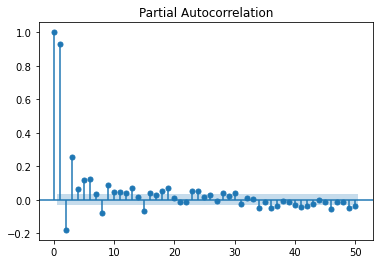

In [36]:
# plot the total electricity pacf
plot_pacf(df['total'], lags = 50);

### Modeling

In [113]:
# Subset our data
model_df = df[['first_diff_total', 'first_diff_ngas', 'first_diff_coal', 'first_diff_wind', 'first_diff_solar', 'first_diff_nuclear']].copy()

# Let's drop rows containing missing data
model_df.dropna(inplace = True)

In [114]:
train, test = train_test_split(model_df,
                              test_size = 0.10, 
                              shuffle=False)

In [115]:
train.head()

,first_diff_total,first_diff_ngas,first_diff_coal,first_diff_wind,first_diff_solar,first_diff_nuclear
date,,,,,,
2011-01-13,6456.022982,15843.61997,-46048.5659,50.55710,-55.317657,-188.79738
2011-01-14,8718.542612,5374.93341,-11604.2569,40544.96586,2.484579,36.05851
2011-01-15,67504.808757,102043.81938,2981.3004,-24581.76231,-2.007320,100.59818
2011-01-16,42763.682947,75593.87760,20394.0272,-17993.12927,12.338145,662.70590
2011-01-17,-124385.154852,-17078.04555,11870.1720,-118610.56384,-6.139670,732.10360


In [116]:
var_model = VAR(train)

/Users/andrewroberts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [117]:
ts_model = var_model.fit(maxlags=5, ic='aic')

In [118]:
# What is the order of our autogressive model?
ts_model.k_ar

5

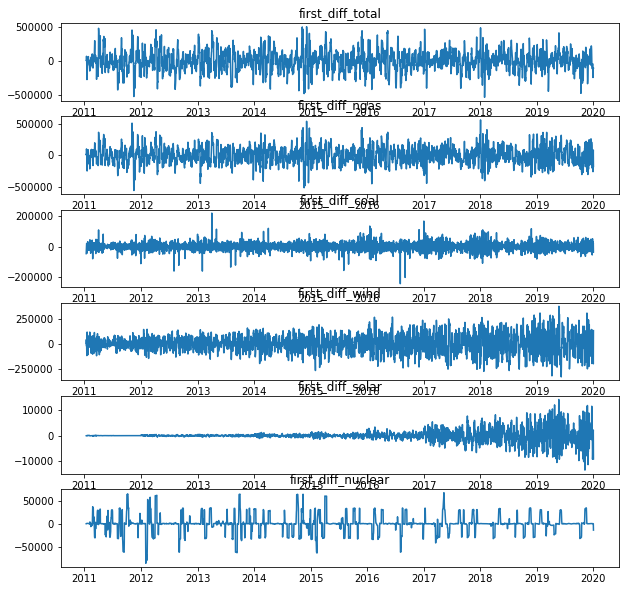

In [119]:
ts_model.plot();

<Figure size 1440x1440 with 0 Axes>

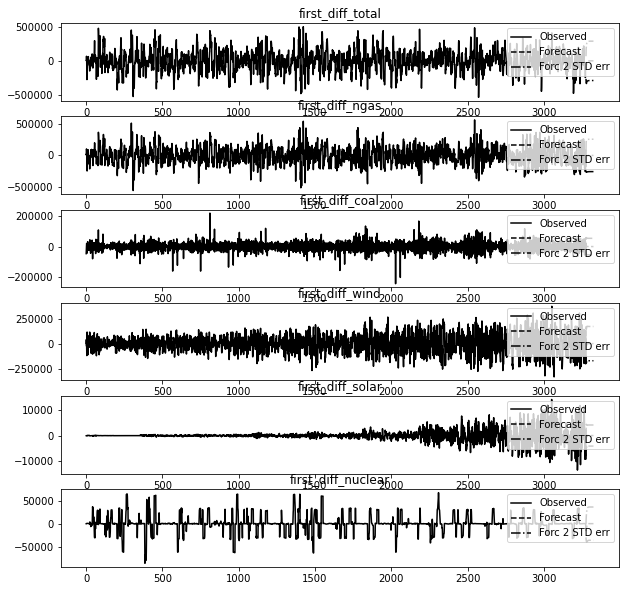

In [120]:
# plot the forecast looking 5 steps ahead
plt.figure(figsize=(20,20))
ts_model.plot_forecast(50);

### Evaluate our models (and forecasts, in possible)

In [121]:
forecast = ts_model.forecast(train.values, len(test))

In [131]:
# Loop through columns and get MSE for each
for i in range(test.shape[1]):
    print(f'The test MSE on the {test.columns[i]} data is: {round(mean_absolute_percentage_error(test.values[:, i], forecast[:, i]), 4)}')

The test MSE on the first_diff_total data is: 1.0106
The test MSE on the first_diff_ngas data is: 1.018
The test MSE on the first_diff_coal data is: 0.9968
The test MSE on the first_diff_wind data is: 0.9969
The test MSE on the first_diff_solar data is: 1.007
The test MSE on the first_diff_nuclear data is: 3.0872


In [132]:
# Loop through columns and get MSE for each
for i in range(test.shape[1]):
    print(f'The test MSE on the {test.columns[i]} data is: {round(mean_squared_error(test.values[:, i], forecast[:, i]), 4)}')

The test MSE on the first_diff_total data is: 14919427674.0711
The test MSE on the first_diff_ngas data is: 16915771377.5677
The test MSE on the first_diff_coal data is: 475721366.5042
The test MSE on the first_diff_wind data is: 16726046185.3318
The test MSE on the first_diff_solar data is: 88882811.9372
The test MSE on the first_diff_nuclear data is: 120191401.3075


In [133]:
# Loop through columns and get RMSE for each
for i in range(test.shape[1]):
    print(f'The test RMSE on the {test.columns[i]} data is: {round(mean_squared_error(test.values[:, i], forecast[:, i], squared=False), 4)}')

The test RMSE on the first_diff_total data is: 122145.1091
The test RMSE on the first_diff_ngas data is: 130060.645
The test RMSE on the first_diff_coal data is: 21811.0377
The test RMSE on the first_diff_wind data is: 129329.2163
The test RMSE on the first_diff_solar data is: 9427.7681
The test RMSE on the first_diff_nuclear data is: 10963.1839


### Evaluate our models (and forecasts, in possible)

In [69]:
forecast = ts_model.forecast(train.values, len(test))

In [70]:
# Loop through columns and get MSE for each
for i in range(test.shape[1]):
    print(f'The test MSE on the {test.columns[i]} data is: {round(mean_squared_error(test.values[:, i], forecast[:, i]), 4)}')

The test MSE on the total data is: 29577405684.7134
The test MSE on the NGas data is: 23416882833.6194
The test MSE on the Coal data is: 6518154937.4332
The test MSE on the first_diff_wind data is: 9770433458.8709
The test MSE on the Solar data is: 422323163.5973
The test MSE on the Nuclear data is: 182154113.8146


In [71]:
# Loop through columns and get RMSE for each
for i in range(test.shape[1]):
    print(f'The test RMSE on the {test.columns[i]} data is: {round(mean_squared_error(test.values[:, i], forecast[:, i], squared=False), 4)}')

The test RMSE on the total data is: 171980.8294
The test RMSE on the NGas data is: 153025.7587
The test RMSE on the Coal data is: 80735.0911
The test RMSE on the first_diff_wind data is: 98845.503
The test RMSE on the Solar data is: 20550.5028
The test RMSE on the Nuclear data is: 13496.4482


In [73]:
from autots import AutoTS

